## KHR Group Work

### Data description
<b>Chest pain type</b>: <br>
<b>ATA</b> - Atypical angina - Angina pectoris which does not have associated classical symptoms of chest pain. Symptoms may include weakness, nausea, or sweating.<br>
<br>
<b>NAP</b> - Non-anginal pain - A chest pain is very likely nonanginal if its duration is over 30 minutes or less than 5 seconds, it increases with inspiration, can be brought on with one movement of the trunk or arm, can be brought on by local fingers pressure, or bending forward, or it can be relieved immediately on lying down.<br>
<br>
<b>ASY</b> - Asymtomatic - Silent (asymptomatic) myocardial ischemia (SMI) is defined as a transient alteration in myocardial perfusion in the absence of chest pain or the usual anginal equivalents.  <br>
<br>
<b>TA</b> - Typical angina - The most common symptom of a heart attack in both males and females is chest pain or discomfort and this can be described as tightness, pressure, squeezing or aching.<br>

<b>RestingBP</b> - resting blood pressure [mm Hg].
<img src="bp.jpg" alt="Blood Pressure" width="500" height="600"> <br>

<b>Cholesterol</b> - serum cholesterol [mm/dl]. (mm/dl Mistake? should be mg/dL?) Measuring your LDL (“bad” cholesterol), HDL (“good” cholesterol), and triglycerides will give you a number called your total blood cholesterol, or serum cholesterol. Healthy serum cholesterol is less than 200 mg/dL. Serum cholesterol = HDL + LDL cholesterol levels + 20 percent of triglycerides.(source:https://www.healthline.com/health/serum-cholesterol) <br>
<br>

<b>FastingBS</b> - fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br>
The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended. If fasting blood glucose is 126 mg/dL (7 mmol/L) or higher on two separate tests, diabetes is diagnosed. An individual with low fasting blood glucose concentration (hypoglycemia) – below 70 mg/dL (3.9 mmol/L) – will experience dizziness, sweating, palpitations, blurred vision and other symptoms that have to be monitored. (source: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380)<br>
<br>

<b>Resting ECG</b> - resting electrocardiogram results:<br>
<b>Normal</b>: Normal, <br>
<b>ST</b>: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),<br>
<b>LVH</b>: showing probable or definite left ventricular hypertrophy by Estes' criteria].<br>
<br>

<b>MaxHR</b> - maximum heart rate achieved [Numeric value between 60 and 202] <br>
<br>
<b>ExerciseAngina</b> - exercise-induced angina [Y: Yes, N: No] <br>
<br>
<b>Oldpeak</b> ST [Numeric value measured in depression] ST depression induced by exercise relative
to rest. (Basicly a line in EKG doesn't come back to zero state, where it should come) (source: https://www.ijrte.org/wp-content/uploads/papers/v8i2S3/B11630782S319.pdf)

<b>ST_Slope</b> - the slope of the peak exercise ST segment. (Basicly the shape of line in certain place in EKG). <br>
<b>Up</b>: upsloping, <br>
<b>Flat</b>: flat, <br>
<b>Down</b>: downsloping. <br>
<br>
<b>HeartDisease</b>: output class [1: heart disease, 0: Normal]





## First look at data

In [1]:
import pandas as pd
data = pd.read_csv('heart.csv')
data.shape
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Distribution of age into 5 bins and men and women separately into same 5 age bins

Minimum age 28
Maximum age 77
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


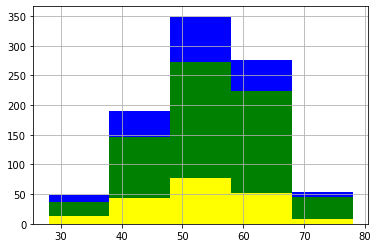

In [2]:
print("Minimum age", data.Age.min())
print("Maximum age", data.Age.max())

bins = [28, 38, 48, 58, 68, 78]

#all data into bins
print(data[('Age')].hist(bins=bins,color='blue'))

#men and women separatewly into bins
men = data[data['Sex'] == 'M']
women = data[data['Sex'] == 'F']
print(men[('Age')].hist(bins=bins,color='green'))
print(women[('Age')].hist(bins=bins,color='yellow'))

In [3]:
# women in age bin of 68-78, only 8 instances and olny one with heart failure. If that instance happens not to be in 
# training set, then can't predict that.
women_68_78 = women[women['Age'] > 67]
women_68_78.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
375,73,F,NAP,160,0,0,ST,121,N,0.0,Up,1
619,74,F,ATA,120,269,0,LVH,121,Y,0.2,Up,0
630,71,F,ASY,112,149,0,Normal,125,N,1.6,Flat,0
644,71,F,NAP,110,265,1,LVH,130,N,0.0,Up,0
688,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,0
788,68,F,NAP,120,211,0,LVH,115,N,1.5,Flat,0
813,69,F,TA,140,239,0,Normal,151,N,1.8,Up,0
870,71,F,ATA,160,302,0,Normal,162,N,0.4,Up,0


### Counts of features values

In [4]:
#count of ChestPainType type values
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [5]:
#count of 'FastingBS' values
data['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [6]:
#count of 'ExerciseAngina' yes, no values
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [7]:
#count of 'Oldpeak' values
data['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.3      7
 2.6      7
 1.1      7
 1.9      7
 1.7      6
 2.2      5
 0.9      4
 3.6      4
 2.4      4
 3.4      3
 2.1      2
-0.1      2
 4.2      2
 3.2      2
 3.5      2
-0.5      2
 2.3      2
-1.0      2
 2.9      1
 3.8      1
-0.9      1
-2.6      1
-1.5      1
 3.7      1
 5.0      1
-2.0      1
-0.8      1
 3.1      1
 4.4      1
 5.6      1
 6.2      1
-0.7      1
-1.1      1
Name: Oldpeak, dtype: int64

In [8]:
#count of 'ST_Slope' values
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [9]:
#20% of the dataset will be set aside for testing in the end
print(len(data)) #20% is ~184
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=0)
data = train
endTestData = test
print(len(data))

918
734


In [10]:
#Data to be manipulated
newData = data

In [11]:
#All possible groups based on age, sex
patients28_38_M = newData[(newData["Age"]>=28) & (newData["Age"]<38) & (newData["Sex"]=="M")] #Age 28-38, Male
patients38_48_M = newData[(newData["Age"]>=38) & (newData["Age"]<48) & (newData["Sex"]=="M")]
patients48_58_M = newData[(newData["Age"]>=48) & (newData["Age"]<58) & (newData["Sex"]=="M")]
patients58_68_M = newData[(newData["Age"]>=58) & (newData["Age"]<68) & (newData["Sex"]=="M")]
patients68_78_M = newData[(newData["Age"]>=68) & (newData["Sex"]=="M")]


patients28_38_F = newData[(newData["Age"]>=28) & (newData["Age"]<38) & (newData["Sex"]=="F")]
patients38_48_F = newData[(newData["Age"]>=38) & (newData["Age"]<48) & (newData["Sex"]=="F")]
patients48_58_F = newData[(newData["Age"]>=48) & (newData["Age"]<58) & (newData["Sex"]=="F")]
patients58_68_F = newData[(newData["Age"]>=58) & (newData["Age"]<68) & (newData["Sex"]=="F")]
patients68_78_F = newData[(newData["Age"]>=68) & (newData["Sex"]=="F")]


print(len(patients28_38_M))
print(len(patients38_48_M))
print(len(patients48_58_M))
print(len(patients58_68_M))
print(len(patients68_78_M))
print("--------------------")
print(len(patients28_38_F))
print(len(patients38_48_F))
print(len(patients48_58_F))
print(len(patients58_68_F))
print(len(patients68_78_F))

#patients48_58_M has the most patients
#Oversample the other groups to match this number
patients =len(patients48_58_M)
newData = newData.append(patients28_38_M.sample(n=patients-len(patients28_38_M), replace=True))
newData = newData.append(patients38_48_M.sample(n=patients-len(patients38_48_M), replace=True))
newData = newData.append(patients58_68_M.sample(n=patients-len(patients58_68_M), replace=True))
newData = newData.append(patients68_78_M.sample(n=patients-len(patients68_78_M), replace=True))

newData = newData.append(patients28_38_F.sample(n=patients-len(patients28_38_F), replace=True))
newData = newData.append(patients38_48_F.sample(n=patients-len(patients38_48_F), replace=True))
newData = newData.append(patients48_58_F.sample(n=patients-len(patients48_58_F), replace=True))
newData = newData.append(patients58_68_F.sample(n=patients-len(patients58_68_F), replace=True))
newData = newData.append(patients68_78_F.sample(n=patients-len(patients68_78_F), replace=True))


print("------------------------------------------------------------------------------------------")
#Let's check if it worked
patients28_38_M = newData[(newData["Age"]>=28) & (newData["Age"]<38) & (newData["Sex"]=="M")] #Age 28-38, Male
patients38_48_M = newData[(newData["Age"]>=38) & (newData["Age"]<48) & (newData["Sex"]=="M")]
patients48_58_M = newData[(newData["Age"]>=48) & (newData["Age"]<58) & (newData["Sex"]=="M")]
patients58_68_M = newData[(newData["Age"]>=58) & (newData["Age"]<68) & (newData["Sex"]=="M")]
patients68_78_M = newData[(newData["Age"]>=68) & (newData["Sex"]=="M")]


patients28_38_F = newData[(newData["Age"]>=28) & (newData["Age"]<38) & (newData["Sex"]=="F")]
patients38_48_F = newData[(newData["Age"]>=38) & (newData["Age"]<48) & (newData["Sex"]=="F")]
patients48_58_F = newData[(newData["Age"]>=48) & (newData["Age"]<58) & (newData["Sex"]=="F")]
patients58_68_F = newData[(newData["Age"]>=58) & (newData["Age"]<68) & (newData["Sex"]=="F")]
patients68_78_F = newData[(newData["Age"]>=68) & (newData["Sex"]=="F")]


print(len(patients28_38_M))
print(len(patients38_48_M))
print(len(patients48_58_M))
print(len(patients58_68_M))
print(len(patients68_78_M))
print("--------------------")
print(len(patients28_38_F))
print(len(patients38_48_F))
print(len(patients48_58_F))
print(len(patients58_68_F))
print(len(patients68_78_F))

30
114
216
183
36
--------------------
7
33
66
42
7
------------------------------------------------------------------------------------------
216
216
216
216
216
--------------------
216
216
216
216
216


In [12]:
#Now let's look at that problematic group (women in age bin of 68-78, only 8 instances and only one with heart failure)
women_68_78 = newData[(newData["Age"]>=68) & (newData["Sex"]=="F")]
print("Number of patients in this group = "+str(len(women_68_78)))
print("Number of patients in this group with heart disease:" +str(len(women_68_78[women_68_78["HeartDisease"]==1])))
#A lot better than before


Number of patients in this group = 216
Number of patients in this group with heart disease:37


In [13]:
#20% of the dataset will be set aside for testing in the end
#print(len(newData)) #20% is 544
#endTestSet = newData.sample(n=544, random_state=0)
#for i in range(len(newData)):
#    for j in range(len(endTestSet)):
#        if newData.iloc[i].equals(endTestSet.iloc[j]):
#            newData.drop(i)
#print(len(newData))

In [14]:
#Balancing data by number of patients with heart disease and without
#print(newData['HeartDisease'].value_counts())
#There are more patients without heart disease than with
#withoutHeartDisease = data[data["HeartDisease"]==0]

#Pick a random sample from withoutHeartDisease with n=data['HeartDisease'].value_counts()[1]-data['HeartDisease'].value_counts()[0]  
#and add it to newData
#sample = withoutHeartDisease.sample(n=newData['HeartDisease'].value_counts()[1]-newData['HeartDisease'].value_counts()[0])
#newData = newData.append(sample)
#print(newData['HeartDisease'].value_counts())



In [15]:
#Balancing data by Sex
#print(newData['Sex'].value_counts())
#A lot more Males compared to Females
#Generate more Female data
#FemaleData = newData[newData["Sex"]=="F"]
#sample = FemaleData.sample(n=newData['Sex'].value_counts()["M"]-newData['Sex'].value_counts()["F"], replace=True)
#newData = newData.append(sample)
#print(newData['Sex'].value_counts())


In [16]:
#Balancing the age groups
#patients28_38 = newData[(newData["Age"]>=28) & (newData["Age"]<38)]
#patients38_48 = newData[(newData["Age"]>=38) & (newData["Age"]<48)]
#patients48_58 = newData[(newData["Age"]>=48) & (newData["Age"]<58)]
#patients58_68 = newData[(newData["Age"]>=58) & (newData["Age"]<68)]
#patients68_78 = newData[newData["Age"]>=68]
#print(len(patients28_38))
#print(len(patients38_48))
#print(len(patients48_58))
#print(len(patients58_68))
#print(len(patients68_78))
#print(" ")
#Generate patients in the smaller groups to match the group with the most patients (48-58)
#patients28_38 = patients28_38.append(patients28_38.sample(n=len(patients48_58)-len(patients28_38), replace=True))
#patients38_48 = patients38_48.append(patients38_48.sample(n=len(patients48_58)-len(patients38_48), replace=True))
#patients58_68 = patients58_68.append(patients58_68.sample(n=len(patients48_58)-len(patients58_68), replace=True))
#patients68_78 = patients68_78.append(patients68_78.sample(n=len(patients48_58)-len(patients68_78), replace=True))
#print(len(patients28_38))
#print(len(patients38_48))
#print(len(patients48_58))
#print(len(patients58_68))
#print(len(patients68_78))

In [17]:
#Now let's take a look at the data
#print("Patients aged 28_38 -> "+ str(len(newData[(newData["Age"]>=28) & (newData["Age"]<38)])))
#print("Patients aged 38_48 -> "+ str(len(newData[(newData["Age"]>=38) & (newData["Age"]<48)])))
#print("Patients aged 48_58 -> "+ str(len(newData[(newData["Age"]>=48) & (newData["Age"]<58)])))
#print("Patients aged 58_68 -> "+ str(len(newData[(newData["Age"]>=58) & (newData["Age"]<68)])))
#print("Patients aged 68_78 -> "+ str(len(newData[newData["Age"]>=68])))

#print("Number of patients by sex:")
#print(newData['Sex'].value_counts())

#print("Number of patients by whether they have heart disease or not:")
#print(newData['HeartDisease'].value_counts())

In [18]:
#One hot encoding
data = pd.get_dummies(newData)
print(data)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
378   70        140            0          1    157      2.0             1   
356   46        115            0          0    113      1.5             1   
738   65        160          360          0    151      0.8             0   
85    66        140          139          0     94      1.0             1   
427   59        140            0          0    117      1.0             1   
..   ...        ...          ...        ...    ...      ...           ...   
788   68        120          211          0    115      1.5             0   
688   76        140          197          0    116      1.1             0   
870   71        160          302          0    162      0.4             0   
630   71        112          149          0    125      1.6             0   
630   71        112          149          0    125      1.6             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
378      0 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'HeartDisease'], data["HeartDisease"], test_size=0.3, random_state=0)


In [20]:
#Training a K nearest neighbors classifier with Euclidean distance and N=1
from sklearn.metrics import accuracy_score
models = pd.DataFrame(columns=['model', 'accuracy'])
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(X_train, y_train)
acc = accuracy_score(y_test, model1.predict(X_test))
models = models.append({'model': "1-NN-E", 'accuracy': acc }, ignore_index=True) #E for Euclidean distance
print(models)

    model  accuracy
0  1-NN-E  0.912037


In [21]:
#Let's train some other models

#Decision tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=0)
model2.fit(X_train, y_train)
acc = accuracy_score(y_test, model2.predict(X_test))
models = models.append({'model': "Decision tree", 'accuracy': acc }, ignore_index=True)


#Random forest with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=0)
model3.fit(X_train, y_train)
acc = accuracy_score(y_test, model3.predict(X_test))
models = models.append({'model': "Random forest with n_estimators = 100", 'accuracy': acc }, ignore_index=True)


#Random forest with n_estimators = 1000
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators = 1000, random_state=0)
model4.fit(X_train, y_train)
acc = accuracy_score(y_test, model4.predict(X_test))
models = models.append({'model': "Random forest with n_estimators = 1000", 'accuracy': acc }, ignore_index=True)
print(models)
#Random forest with n_estimators = 1000 is pretty good, let's get rid of the rest and train a new model for every group based on age and sex
models = pd.DataFrame(columns=['model', 'accuracy'])
models = models.append({'model': "All patients", 'accuracy': acc }, ignore_index=True)


                                    model  accuracy
0                                  1-NN-E  0.912037
1                           Decision tree  0.936728
2   Random forest with n_estimators = 100  0.958333
3  Random forest with n_estimators = 1000  0.959877


In [22]:
patients28_38_M = newData[(newData["Age"]>=28) & (newData["Age"]<38) & (newData["Sex"]=="M")]
patients28_38_M = pd.get_dummies(patients28_38_M)
X_train, X_test, y_train, y_test = train_test_split(patients28_38_M.loc[:, patients28_38_M.columns != 'HeartDisease'], patients28_38_M["HeartDisease"], test_size=0.3, random_state=0)
patients28_38_M_model = RandomForestClassifier(n_estimators = 1000, random_state=0)
patients28_38_M_model.fit(X_train, y_train)
acc = accuracy_score(y_test, patients28_38_M_model.predict(X_test))
models = models.append({'model': "patients28_38_M_model", 'accuracy': acc }, ignore_index=True)

patients38_48_M = newData[(newData["Age"]>=38) & (newData["Age"]<48) & (newData["Sex"]=="M")]
patients38_48_M = pd.get_dummies(patients38_48_M)
X_train, X_test, y_train, y_test = train_test_split(patients38_48_M.loc[:, patients38_48_M.columns != 'HeartDisease'], patients38_48_M["HeartDisease"], test_size=0.3, random_state=0)
patients38_48_M_model = RandomForestClassifier(n_estimators = 1000, random_state=0)
patients38_48_M_model.fit(X_train, y_train)
acc = accuracy_score(y_test, patients38_48_M_model.predict(X_test))
models = models.append({'model': "patients38_48_M_model", 'accuracy': acc }, ignore_index=True)

patients48_58_M = newData[(newData["Age"]>=48) & (newData["Age"]<58) & (newData["Sex"]=="M")]
patients48_58_M = pd.get_dummies(patients48_58_M)
X_train, X_test, y_train, y_test = train_test_split(patients48_58_M.loc[:, patients48_58_M.columns != 'HeartDisease'], patients48_58_M["HeartDisease"], test_size=0.3, random_state=0)
patients48_58_M_model = RandomForestClassifier(n_estimators = 1000, random_state=0)
patients48_58_M_model.fit(X_train, y_train)
acc = accuracy_score(y_test, patients48_58_M_model.predict(X_test))
models = models.append({'model': "patients48_58_M_model", 'accuracy': acc }, ignore_index=True)

patients58_68_M = newData[(newData["Age"]>=58) & (newData["Age"]<68) & (newData["Sex"]=="M")]
patients58_68_M = pd.get_dummies(patients58_68_M)
X_train, X_test, y_train, y_test = train_test_split(patients58_68_M.loc[:, patients58_68_M.columns != 'HeartDisease'], patients58_68_M["HeartDisease"], test_size=0.3, random_state=0)
patients58_68_M_model = RandomForestClassifier(n_estimators = 1000, random_state=0)
patients58_68_M_model.fit(X_train, y_train)
acc = accuracy_score(y_test, patients58_68_M_model.predict(X_test))
models = models.append({'model': "patients58_68_M_model", 'accuracy': acc }, ignore_index=True)

patients68_78_M = newData[(newData["Age"]>=68) & (newData["Sex"]=="M")]
patients68_78_M = pd.get_dummies(patients68_78_M)
X_train, X_test, y_train, y_test = train_test_split(patients68_78_M.loc[:, patients68_78_M.columns != 'HeartDisease'], patients68_78_M["HeartDisease"], test_size=0.3, random_state=0)
patients68_78_M_model = RandomForestClassifier(n_estimators = 1000, random_state=0)
patients68_78_M_model.fit(X_train, y_train)
acc = accuracy_score(y_test, patients68_78_M_model.predict(X_test))
models = models.append({'model': "patients68_78_M_model", 'accuracy': acc }, ignore_index=True)



patients28_38_F = newData[(newData["Age"]>=28) & (newData["Age"]<38) & (newData["Sex"]=="F")]
patients28_38_F = pd.get_dummies(patients28_38_F)
X_train, X_test, y_train, y_test = train_test_split(patients28_38_F.loc[:, patients28_38_F.columns != 'HeartDisease'], patients28_38_F["HeartDisease"], test_size=0.3, random_state=0)
patients28_38_F_model = RandomForestClassifier(n_estimators = 1000, random_state=0)
patients28_38_F_model.fit(X_train, y_train)
acc = accuracy_score(y_test, patients28_38_F_model.predict(X_test))
models = models.append({'model': "patients28_38_F_model", 'accuracy': acc }, ignore_index=True)

patients38_48_F = newData[(newData["Age"]>=38) & (newData["Age"]<48) & (newData["Sex"]=="F")]
patients38_48_F = pd.get_dummies(patients38_48_F)
X_train, X_test, y_train, y_test = train_test_split(patients38_48_F.loc[:, patients38_48_F.columns != 'HeartDisease'], patients38_48_F["HeartDisease"], test_size=0.3, random_state=0)
patients38_48_F_model = RandomForestClassifier(n_estimators = 1000, random_state=0)
patients38_48_F_model.fit(X_train, y_train)
acc = accuracy_score(y_test, patients38_48_F_model.predict(X_test))
models = models.append({'model': "patients38_48_F_model", 'accuracy': acc }, ignore_index=True)

patients48_58_F = newData[(newData["Age"]>=48) & (newData["Age"]<58) & (newData["Sex"]=="F")]
patients48_58_F = pd.get_dummies(patients48_58_F)
X_train, X_test, y_train, y_test = train_test_split(patients48_58_F.loc[:, patients48_58_F.columns != 'HeartDisease'], patients48_58_F["HeartDisease"], test_size=0.3, random_state=0)
patients48_58_F_model = RandomForestClassifier(n_estimators = 1000, random_state=0)
patients48_58_F_model.fit(X_train, y_train)
acc = accuracy_score(y_test, patients48_58_F_model.predict(X_test))
models = models.append({'model': "patients48_58_F_model", 'accuracy': acc }, ignore_index=True)

patients58_68_F = newData[(newData["Age"]>=58) & (newData["Age"]<68) & (newData["Sex"]=="F")]
patients58_68_F = pd.get_dummies(patients58_68_F)
X_train, X_test, y_train, y_test = train_test_split(patients58_68_F.loc[:, patients58_68_F.columns != 'HeartDisease'], patients58_68_F["HeartDisease"], test_size=0.3, random_state=0)
patients58_68_F_model = RandomForestClassifier(n_estimators = 1000, random_state=0)
patients58_68_F_model.fit(X_train, y_train)
acc = accuracy_score(y_test, patients58_68_F_model.predict(X_test))
models = models.append({'model': "patients58_68_F_model", 'accuracy': acc }, ignore_index=True)

patients68_78_F = newData[(newData["Age"]>=68) & (newData["Sex"]=="F")]
patients68_78_F = pd.get_dummies(patients68_78_F)
X_train, X_test, y_train, y_test = train_test_split(patients68_78_F.loc[:, patients68_78_F.columns != 'HeartDisease'], patients68_78_F["HeartDisease"], test_size=0.3, random_state=0)
patients68_78_F_model = RandomForestClassifier(n_estimators = 1000, random_state=0)
patients68_78_F_model.fit(X_train, y_train)
acc = accuracy_score(y_test, patients68_78_F_model.predict(X_test))
models = models.append({'model': "patients68_78_F_model", 'accuracy': acc }, ignore_index=True)
print(models)


                    model  accuracy
0            All patients  0.959877
1   patients28_38_M_model  1.000000
2   patients38_48_M_model  0.953846
3   patients48_58_M_model  0.830769
4   patients58_68_M_model  0.892308
5   patients68_78_M_model  0.969231
6   patients28_38_F_model  1.000000
7   patients38_48_F_model  1.000000
8   patients48_58_F_model  0.938462
9   patients58_68_F_model  1.000000
10  patients68_78_F_model  1.000000


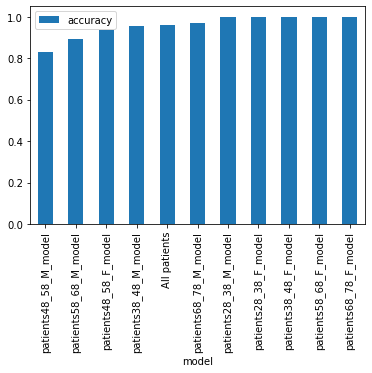

In [23]:
models = models.sort_values(by="accuracy")
import matplotlib.pyplot as plt
ax = models.plot.bar(x="model", y="accuracy")

                               model  accuracy
0              patients48_58_M_model  0.830769
1              patients58_68_M_model  0.892308
2              patients48_58_F_model  0.938462
3              patients38_48_M_model  0.953846
4                       All patients  0.959877
5              patients68_78_M_model  0.969231
6              patients28_38_M_model  1.000000
7              patients28_38_F_model  1.000000
8              patients38_48_F_model  1.000000
9              patients58_68_F_model  1.000000
10             patients68_78_F_model  1.000000
11  All patients (original test set)  0.864130


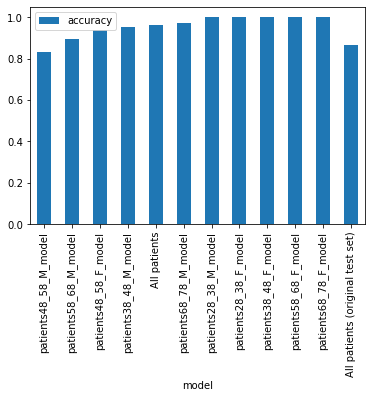

In [24]:
#Now testing the main model on the original 20% test data
#orig = endTestData.copy(deep=True)
endTestData = pd.get_dummies(endTestData)
features = endTestData.drop(columns=["HeartDisease"])
HD = endTestData["HeartDisease"]



#all patients
acc = accuracy_score(HD, model4.predict(features))
models = models.append({'model': "All patients (original test set)", 'accuracy': acc }, ignore_index=True)

print(models)
ax = models.plot.bar(x="model", y="accuracy")

In [ ]:
#We are also interested in false negative and false positive rate
#False positive rate:
#False positives/Total negatives
#False negative rate:
#False negatives/Total positives
predictedSet = model4.predict(features)
#HD contains the actual labels
falsePositives = 0
totalNegatives = 0
totalPositives = 0
falseNegatives = 0
print(HD.iloc[1])
        
print("False positive rate: "+str(falsePositives/totalNegatives))
print("False negative rate: "+str(falseNegatives/totalPositives))